By: Tyler Cristiano & Alan Simon

# A Data Science Tutorial: Exploring the Impact of COVID-19 on the 2019-2020 NBA Season

# Introduction
The goal of this notebook is to explain the data science lifecycle through a step by step tutorial of an applied data science project. This project explores the possibility of the COVID-19 induced NBA "bubble" having a notable impact on the way games have been played by NBA teams. This hypothesis will be explored through thorough analysis as we guide you through the five different parts of the data science lifecycle: 1) data collection, 2) data processing, 3) exploratory analysis & data visualization, 4) Model: Analysis, hypothesis testing, & machine learning, 5) interpretation: insight & policy decision. It is our hope that you will have a clear understanding of data science and how it can be applied to infer new things from existing data upon completion of this tutorial. The best part about all of this is that all of the technology used in this tutorial is available free of charge with a ton of documentation available online for further clarification if needed.

   
Before we get into the core of this project, a brief introduction into the way NBA seasons typically work and how the 2019-2020 season differed from the rest is necessary. NBA regular seasons usually start in mid-October and end in April. Each team plays 82 games in the regular season. Shortly after the regular season, the Playoffs occur in late April which include 16 teams: the top 8 teams from each of the two conferences (Eastern and Western). The Playoffs concludes with the NBA Finals (the championship between the 2 conference champions) which typically occurs in early June. All postseason games are best-of-7 series. 
   
The 2019-2020 NBA regular season began on October 22, 2019 and had a scheduled end date of April 15, 2020. Unfortunately, due to the COVID-19 pandemic, the regular season was suspended on March 11. A plan was adopted by the NBA Board of Governors to resume the regular season on July 30th with an adjusted structure. Instead of all 30 NBA teams resuming play, only the 22 best teams continued to play 8 regular season games to determine which 16 teams get what seeds in the playoffs. A total of 72 regular season games were played instead of the traditional 82 game count. The playoffs followed with their usual format, and the Finals thereafter. All of the games that occurred after the season's suspension were played in an isolated, COVID-19 free Disney World Resort in Florida. The location was nicknamed the "bubble" because of its isolated nature. The 22 teams that entered the bubble were not permitted to leave until the conclusion of their respective seasons, resulting in personnel staying away from home and society at large for up to 3 months at end. It is not hard to imagine that the isolation and close proximity afforded to teams under these circumstances impacted the way they played basketball, and that is what we aim to analyze.

# Part I & II: Data Collection & Data Processing
We will use publicly available NBA data. The data collection phase of the data science lifecycle is focused on gathering the data to be processed. This is done through several methods such as web scraping, API querying, direct download and load from local storage, etc. This project will primarily involve direct download and load from local storage and API web querying.

The data processing phase of the data science lifecycle involves taking our collected data and manipulating it so that it is easy to work with when we explore our data further and do a deeper analysis on it. This stage in the lifecycle is crucial because it makes subsequent stages less complicated. We often "tidy" our data in this stage, thereby making datasets interact nicely with one another. For tabular data, we want variables in columns and observations in rows. See [Hadley Wickham's paper on Tidy Data](https://vita.had.co.nz/papers/tidy-data.pdf) for an in-depth explanation of tidy data.

The first thing we need to do is get a [list of names of all 30 NBA teams](https://www.fueledbysports.com/list-of-nba-teams-in-alphabetical-order/). We send an HTTP request to the server that hosts the team names so we can manipulate the names. 

In [ ]:
import pandas as pd
import numpy as np
import requests
#from io import BytesIO

url = 'https://www.fueledbysports.com/wp-content/uploads/List-of-NBA-Teams-Alphabetical-Order.xlsx' # url containing the excel file with desired team list
teams_bytes = requests.get(url, headers = {"User-Agent":"Chrome/84.0"}).content # htttp request to server hosting desired list, returns an object of class 'bytes'

Now that we have a successful http request and we have retrieved the contents that it has returned, we want to store the data in a manner that allows for easy manipulation. We do the bulk of our data manipulation with [Pandas](https://pandas.pydata.org/) which is a Python library that specializes in the manipulation of tabular data. We could also pair Pandas with [NumPy](https://numpy.org/), a Python library that provides efficient math operations for vectors and matrices. Below, we store the content into a dataframe object and then manipulate the dataframe so that there is a 'Name' label for the column of team names. We also adjust the indexing of the teams.

In [ ]:
teams = pd.read_excel(teams_bytes) # read the list into a pandas dataframe
teams.loc[-1] = 'Atlanta Hawks' # row to add
teams.index += 1 # shift indexes
teams.sort_index(inplace=True) # sort indexes
teams.columns = ['Name'] # Add a column name to list
print(teams)

                      Name
0            Atlanta Hawks
1           Boston Celtics
2            Brooklyn Nets
3        Charlotte Hornets
4            Chicago Bulls
5      Cleveland Cavaliers
6         Dallas Mavericks
7           Denver Nuggets
8          Detroit Pistons
9    Golden State Warriors
10         Houston Rockets
11          Indiana Pacers
12    Los Angeles Clippers
13      Los Angeles Lakers
14       Memphis Grizzlies
15              Miami Heat
16         Milwaukee Bucks
17  Minnesota Timberwolves
18    New Orleans Pelicans
19         New York Knicks
20   Oklahoma City Thunder
21           Orlando Magic
22      Philadelphia 76ers
23            Phoenix Suns
24  Portland Trail Blazers
25        Sacramento Kings
26       San Antonio Spurs
27         Toronto Raptors
28               Utah Jazz
29      Washington Wizards


Now that we have a list containing all 30 NBA teams, we need to narrow this list down to the 22 teams that were invited to play in the bubble. The teams that were not invited to the NBA bubble include [Chicago, Atlanta, Golden State, New York, Minnesota, Charlotte, Cleveland and Detroit](https://www.chicagotribune.com/sports/bulls/ct-chicago-bulls-nba-teams-practice-20200819-o5kxfxsdybfvxmsqggoschvo2m-story.html). We will proceed to remove these teams from our data frame.

In [ ]:
not_in = ['Chicago Bulls', 'Atlanta Hawks', 'Golden State Warriors', 'New York Knicks', 'Minnesota Timberwolves', 'Charlotte Hornets', 'Cleveland Cavaliers',
          'Chicago Bulls*', 'Atlanta Hawks*', 'Golden State Warriors*', 'New York Knicks*', 'Minnesota Timberwolves*', 'Charlotte Hornets*', 'Cleveland Cavaliers*']
teams = teams[~teams.Name.isin(not_in)] # remove the 8 teams not invited to the bubble from the dataframe
teams.reset_index(drop=True, inplace=True) # reset indexing
print(teams)

                      Name
0           Boston Celtics
1            Brooklyn Nets
2         Dallas Mavericks
3           Denver Nuggets
4          Detroit Pistons
5          Houston Rockets
6           Indiana Pacers
7     Los Angeles Clippers
8       Los Angeles Lakers
9        Memphis Grizzlies
10              Miami Heat
11         Milwaukee Bucks
12    New Orleans Pelicans
13   Oklahoma City Thunder
14           Orlando Magic
15      Philadelphia 76ers
16            Phoenix Suns
17  Portland Trail Blazers
18        Sacramento Kings
19       San Antonio Spurs
20         Toronto Raptors
21               Utah Jazz
22      Washington Wizards


We now have a dataframe containing the 22 teams that were part of the resumption of the 2019-2020 season. Better yet, the data is in a tidy format that is easy to work with. This dataframe will come in handy later. We now want to investigate datasets that give us performance statistics for each of these 22 teams during the resumption of the season. Fortunately for us, [basketball-reference.com](https://www.basketball-reference.com/) has tons of free and public datasets to work with. We will load relevant datasets into dataframes so we can manipulate them in Python. 

basketball-reference.com does not have an accessible API and makes HTML-exclusive web scraping difficult due to Javascript that hides relevant HTML table elements that we would like to access. Javascript is outside the scope of this tutorial (if interested, you could look into how the [Selenium library could be used to extract Javascript-derived HTML elements](https://www.scrapingbee.com/blog/selenium-python/)).  Fortunately, the site provides free conversion of the tables to csv-formatted strings. We take the csv strings, save them as csv files in our text editor of choice, then host the csv files on google drive. We then mount the google drive into our python virtual environment (it is assumed that you are accessing this through notebook through google colab). Once the drive is mounted, we load each of the .csv files containing our datasets into dataframes with `pandas.read_csv()` Technically, we could just skip the whole process of creating csv files for the csv-formatted strings and just use the raw strings in our code. There is  a major downside to this, however, in that it makes our code filled with tons of rows from the csv strings. Saving the strings to files first is cleaner.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Represent "Team Per Game" stat tables for all 20 seasons starting from 2000-2001 season up to and including
# 2019-2020 season as dataframes
team_per_game_1920 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 1920.csv') 
team_per_game_1819 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 1819.csv') 
team_per_game_1718 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 1718.csv') 
team_per_game_1617 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 1617.csv') 
team_per_game_1516 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 1516.csv')
team_per_game_1415 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 1415.csv')
team_per_game_1314 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 1314.csv')
team_per_game_1213 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 1213.csv')
team_per_game_1112 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 1112.csv')
team_per_game_1011 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 1011.csv')
team_per_game_0910 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 0910.csv')
team_per_game_0809 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 0809.csv')
team_per_game_0708 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 0708.csv')
team_per_game_0607 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 0607.csv')
team_per_game_0506 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 0506.csv')
team_per_game_0405 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 0405.csv')
team_per_game_0304 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 0304.csv')
team_per_game_0203 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 0203.csv')
team_per_game_0102 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 0102.csv')
team_per_game_0001 = pd.read_csv(r'/content/drive/My Drive/CMSC320 Final/Team Per Game Stats/team per game stats 0001.csv')

In the code above, we collected data tables titled "Team Per Game," "Opponent Per Game," "Team," "Opponent," "Team Shooting," and "Opponent Shooting," and assigned them to corresponding dataframes (more in-depth descriptions of each of these tables will come later). A total of 20 seasons worth of "Team Per Game" data tables were collected. The "Team Per Game" tables span all the seasons from as early as the 2000-2001 season up to and including the most recent 2019-2020 season. It makes sense to compare the 2019-2020 season to the consecutive seasons that precede it for a few reasons. The first reason is recency. We would expect the data to be easy to compare since mostly all the same teams would be present. Furthermore, a year-by-year analysis of this sort makes the most sense logically. It will show obvious trends that exist and are actually meaningful. Sure, you *could* plot random seasons against each other in no particular order or with gaps between seasons, but it would hard to make inferences from the data which defeats the point of data science.

In the early days of the NBA, the game was played with more physicality and more of an emphasis was placed on driving to the paint to score 2-pt field goals. 3-pt attempts were less common overall amongst players. Fast forward to present day, the 3-point shot is more prevalent than ever before. There are a plethora of players known for their advanced shooting abilities. We have not analyzed data for the entirety of the history of the NBA, but it would not be unreasonable to guess that more points are tallied per game in today's game versus the old days. This further explains our choice of seasons to compare the 19'-20' season against; it makes sense to compare similar and relevant data for our hypothesis.

The next step is to use our `not_in` list to remove all teams that were not invited to the bubble from each of our dataframes we created in the previous code cell. We can easily do this by looping through all the dataframes and using pandas function `isin()` to replace each dataframe with a version of itself that only has rows of teams listed in the `not_in` list.

In [ ]:
tables = [team_per_game_0001, team_per_game_0102,
     team_per_game_0203, team_per_game_0304, team_per_game_0405,
     team_per_game_0506, team_per_game_0607,
     team_per_game_0708, team_per_game_0809,
     team_per_game_0910, team_per_game_1011,
     team_per_game_1112, team_per_game_1213,
     team_per_game_1314, team_per_game_1415,
     team_per_game_1516, team_per_game_1617,
     team_per_game_1718, team_per_game_1819,
     team_per_game_1920]

# i = 0
# while (i < len(tables)):
#   #tables[i].reset_index(inplace=True)
#   #tables[i].drop('Rk', axis=1, inplace=True) # Remove unneeded 'Rk' column
#   # remove teams that are not in bubble from each table
#   index_names = tables[i][~tables[i]['Team'].isin(teams)].index
#   tables[i].drop(index_names, inplace=True)
#   i += 1

# team_per_game_1920

Now that we have removed irrelevant teams from our tables, removed irrelevant rank information, and made our data tidy, we can now go ahead and proceed with the analysis of our data.

# Part III: Exploratory Analysis & Data Visualization

We must consider how the different tables are to be compared and how their distributions may differ. We know that we will be comparing Team Per Game 
Stats over the span of 20 seasons. Given the unusual circumstances of this year, the 2019-2020 season only had 72 games while previous seasons generally 82 games. This might seem like an issue when comparing the data but it is not because all of the datasets calculate their entries with the same methodology. 

The team per game stats contains various metrics of team performance per game for each of our 22 teams. See the glossary below as well as the team per game stats table for the 2019-2020 season below to get a feel for the general format of this type of data.

---
G -- Games

MP -- Minutes Played

FG -- Field Goals

FGA -- Field Goal Attempts

FG% -- Field Goal Percentage

3P -- 3-Point Field Goals

3PA -- 3-Point Field Goal Attempts

3P% -- 3-Point Field Goal Percentage

2P -- 2-Point Field Goals

2PA -- 2-point Field Goal Attempts

2P% -- 2-Point Field Goal Percentage

FT -- Free Throws

FTA -- Free Throw Attempts

FT% -- Free Throw Percentage

ORB -- Offensive Rebounds

DRB -- Defensive Rebounds

TRB -- Total Rebounds

AST -- Assists

STL -- Steals

BLK -- Blocks

TOV -- Turnovers

PF -- Personal Fouls

PTS -- Points

---



In [ ]:
team_per_game_1920

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Dallas Mavericks*,75,242.3,41.7,90.3,0.461,15.1,41.3,0.367,26.5,49.0,0.541,18.6,23.8,0.779,10.5,36.4,46.9,24.7,6.1,4.8,12.7,19.5,117.0
1,2.0,Milwaukee Bucks*,73,241.0,43.3,90.9,0.476,13.8,38.9,0.355,29.5,52.0,0.567,18.3,24.7,0.742,9.5,42.2,51.7,25.9,7.2,5.9,15.1,19.6,118.7
2,3.0,Portland Trail Blazers*,74,241.0,42.2,91.2,0.463,12.9,34.1,0.377,29.3,57.1,0.514,17.7,22.1,0.804,10.2,35.1,45.3,20.6,6.3,6.1,12.8,21.7,115.0
3,4.0,Houston Rockets*,72,241.4,40.8,90.4,0.451,15.6,45.3,0.345,25.1,45.2,0.557,20.6,26.1,0.791,9.8,34.5,44.3,21.6,8.7,5.2,14.7,21.8,117.8
4,5.0,Los Angeles Clippers*,72,241.4,41.6,89.2,0.466,12.4,33.5,0.371,29.1,55.8,0.522,20.8,26.3,0.791,10.7,37.0,47.7,23.7,7.1,4.7,14.6,22.1,116.3
5,6.0,New Orleans Pelicans,72,242.1,42.6,91.6,0.465,13.6,36.9,0.370,28.9,54.8,0.528,17.1,23.4,0.729,11.1,35.4,46.5,26.8,7.5,5.0,16.4,21.2,115.8
6,7.0,Phoenix Suns,73,241.0,41.2,88.1,0.468,11.4,31.8,0.358,29.8,56.3,0.529,19.9,23.8,0.834,9.8,33.8,43.5,27.2,7.7,4.0,14.8,22.0,113.6
7,8.0,Washington Wizards,72,241.0,41.5,90.9,0.457,12.0,32.6,0.368,29.5,58.3,0.506,19.4,24.6,0.788,10.2,31.9,42.0,25.0,8.0,4.3,14.2,22.7,114.4
8,9.0,Memphis Grizzlies,73,240.7,42.5,90.9,0.468,10.9,31.5,0.347,31.6,59.4,0.532,16.6,21.8,0.763,10.3,36.2,46.5,26.9,7.9,5.5,15.2,21.2,112.6
9,10.0,Boston Celtics*,72,242.1,41.3,89.6,0.461,12.6,34.5,0.364,28.7,55.0,0.522,18.6,23.2,0.801,10.7,35.4,46.1,23.0,8.3,5.6,13.8,21.6,113.7


There is a great deal of information that we can analyze here. To start, we could explore the league average in FG % per game over the 20 seasons we have data for.
We will do this by creating a scatter plot with each season's league average for FG % per game. In order to create plots and/or graphs, we will have to import a library. In general, for Python, there are two popular data visualization libraries to choose from: [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/). Both work really well for most purposes. For now, we will demonstrate Matplotlib. To use it we import it like so `import matplotlib.pyplot as plt` and then call the appropriate functions to `plt` in order to create our
scatter plot.

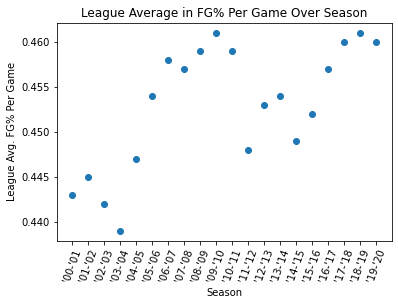

In [ ]:
import matplotlib.pyplot as plt

# x-axis values
x = ["'00-'01","'01-'02","'02-'03","'03-'04","'04-'05","'05-'06","'06-'07",
     "'07-'08","'08-'09","'09-'10","'10-'11","'11-'12","'12-'13","'13-'14",
     "'14-'15","'15-'16","'16-'17", "'17-'18", "'18-'19", "'19-'20" ]
# list of team_per_game tables
team_per_game_tables = [team_per_game_0001, team_per_game_0102,
     team_per_game_0203, team_per_game_0304, team_per_game_0405,
     team_per_game_0506, team_per_game_0607,
     team_per_game_0708, team_per_game_0809,
     team_per_game_0910, team_per_game_1011,
     team_per_game_1112, team_per_game_1213,
     team_per_game_1314, team_per_game_1415,
     team_per_game_1516, team_per_game_1617,
     team_per_game_1718, team_per_game_1819,
     team_per_game_1920]

y = [] # to be filled with y-axis values

# for each team_per_game table, store the average FG % per game in the list
# y so we can use this list to plot y values in our scatter plot
i = 0
while i < len(team_per_game_tables):
  y.append(float(team_per_game_tables[i].iloc[[-1]]['FG%']))
  i += 1

plt.scatter(x, y) # create a scatter plot
plt.xticks(x, rotation=70) # adjust x-tick labels so that they are rotated
plt.title('League Average in FG% Per Game Over Season') # title for plot
plt.xlabel('Season') # label for x-axis
plt.ylabel('League Avg. FG% Per Game') # label for y-axis
plt.show() # display the plot

The plot does not show a constant linear trend throughout. The plot shows peaks and valleys. The range of seasons between the '00-'01 season and and the '03-'04 season saw generally low average league FG % per game with values in the range [~ .433, .445]. The range of seasons between the '03-'04 season and the '06-'07 season saw a steady, steep upward increase in the league average. During these seasons, the range of league averages was [~.433, ~.458].
The highest recorded league average FG % per game occurred during the '09-'10 season and again during the '18-'19 seasons at .463. In most recent times ('14-'15 through '19-'20) there has been a steady increase in the league average FG % per game, with a very slight decrease in value in the most recent season.

Now, let's try observing the difference in league averages for 2-point field goal% per game over the 20 seasons. This involves the same procedure as our last code cell; plot a scatter plot with change in league average 2-point FG% per game over the 20 seasons.

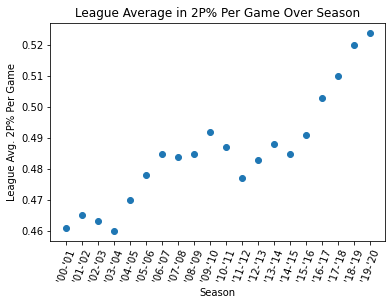

In [ ]:
plt.clf() # cleare the figure used to create the previous scatter plot
y = []
# for each team_per_game table, store the average 2P% per game in the list
# y so we can use this list to plot y values in our scatter plot
i = 0
while i < len(team_per_game_tables):
  y.append(float(team_per_game_tables[i].iloc[[-1]]['2P%']))
  i += 1

plt.scatter(x, y) # create a scatter plot
plt.xticks(x, rotation=70) # adjust x-tick labels so that they are rotated
plt.title('League Average in 2P% Per Game Over Season') # title for plot
plt.xlabel('Season') # label for x-axis
plt.ylabel('League Avg. 2P% Per Game') # label for y-axis
plt.show() # display the plot

This scatter plot looks similar to the previous one. It seems that over time, the league average in 2-point percentage per game has increased. We still would not consider this graph to be linear, but the league average 2P% per game does obviously increase over time. The earliest seasons saw lower averages than the most recent seasons. The seasons spanning from '00-'01 to '03-'04 stayed between .46 and .467, so no major change there, but still lower than the seasons that followed. There has been a clear upward trend for league averages between the '14-'15 and '19-'20 seasons. The '19-'20 season has the highest league average 2P% per game at .525. The peaks and valleys in this graph seem to mirror the peaks and valleys for average FG% in the previous graph. This makes sense because most field goals made and attempted are 2-point field goals. This is true because they are generally easier to make because of the closer distance to the rim. There is a reason why 3-point shooters are considered skill players. Every one in the NBA can score from within the arc but few can score consistently beyond it.
 
We will repeat the same process as witnessed in the previous two graphs with the other league average metrics from the team per game stats.

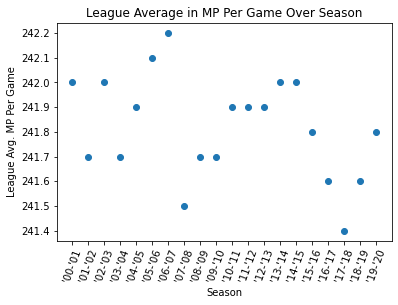

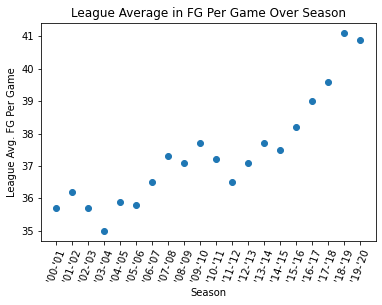

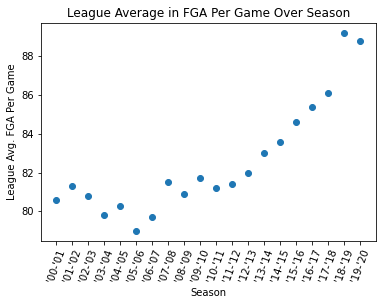

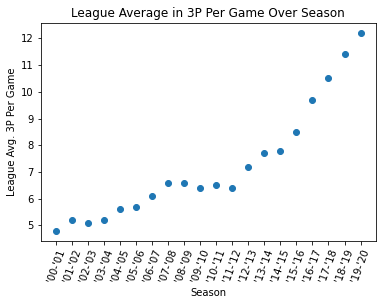

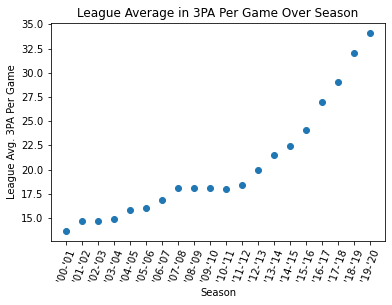

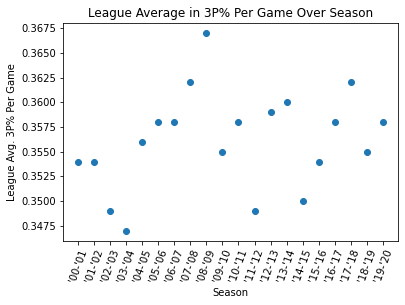

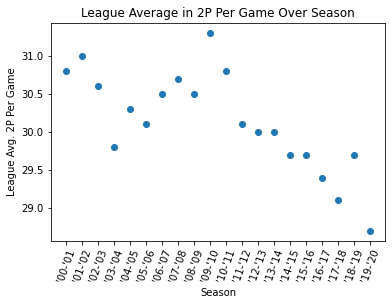

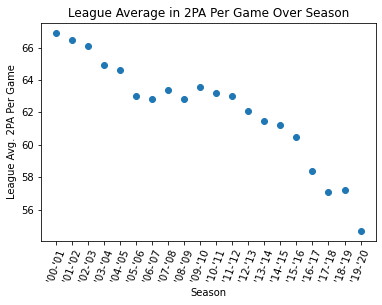

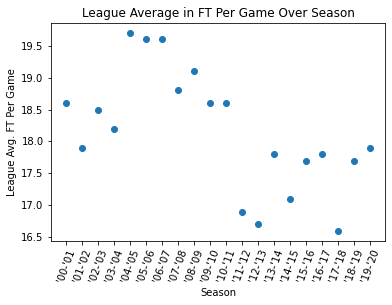

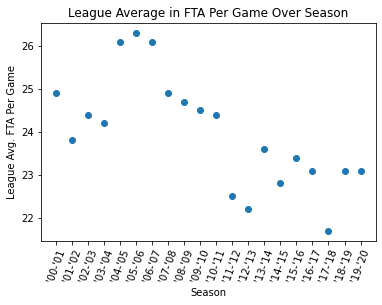

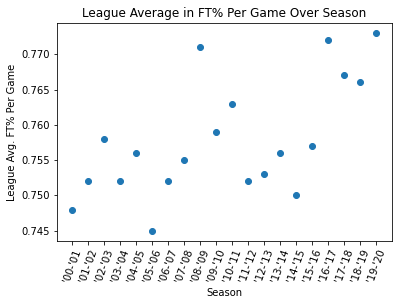

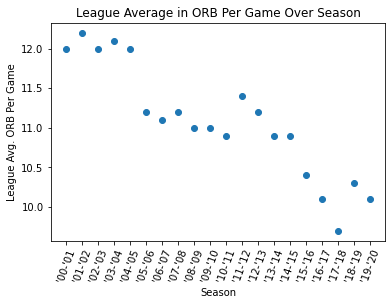

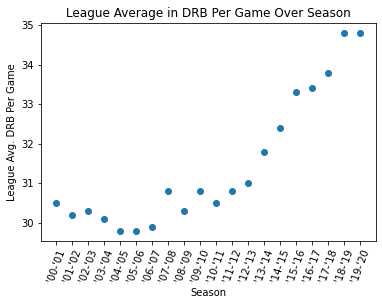

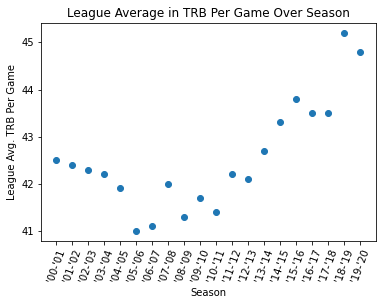

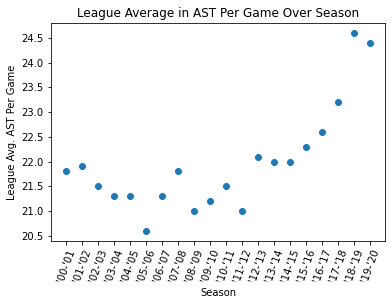

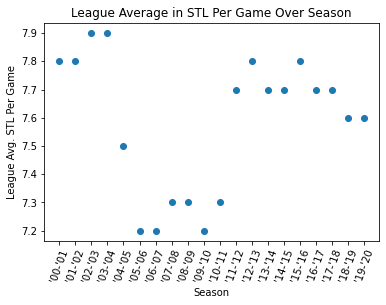

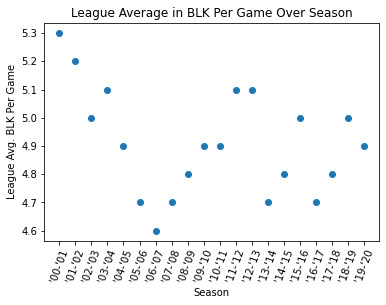

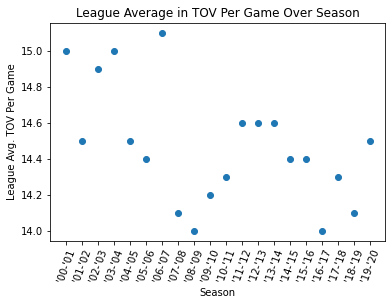

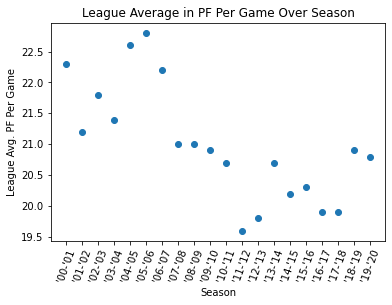

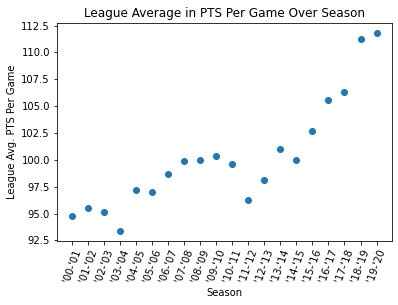

In [ ]:
stats = list(team_per_game_1920)
# Remove the variables that we have already visualized as well as any variables
# that provide little meaning when visualized
stats.remove('Rk')
stats.remove('FG%')
stats.remove('2P%')
stats.remove('Team')
stats.remove('G')

i = 0
while i < len(stats):
  plt.clf() # cleare the figure used to create the previous scatter plot
  stat = stats[i] 
  y = []

  # for each team_per_game table, store the average stat per game in the list
  # y so we can use this list to plot y values in our scatter plot
  j = 0
  while j < len(team_per_game_tables):
    y.append(float(team_per_game_tables[j].iloc[[-1]][stat]))
    j += 1

  plt.scatter(x, y) # create a scatter plot
  plt.xticks(x, rotation=70) # adjust x-tick labels so that they are rotated
  plt.title('League Average in ' + stat + ' Per Game Over Season') # title for plot
  plt.xlabel('Season') # label for x-axis
  plt.ylabel('League Avg. ' + stat + ' Per Game') # label for y-axis

  if stat == 'PTS':
    pts = y
  if stat == 'FG':
    fg = y
  if stat == '3P':
    three_p = y
  if stat == '3PA':
    three_p_a = y
  plt.show() # display the plot
  i += 1

Some interesting trends are visible in these scatter plots. There is a linear trend with average 3 point field goals (3P) made per game. Similarly, there is also a linear trend with a positive slope for 3 point field goals attempted (3A). Percentage of 3 point field goals made (3P%) has varied unpredictably over the last 4 seasons.  Based on the plots and trends, the only stat that seems to have been affected by the bubble is the 2P.  Both the 2P and 2PA reached all time lows during the bubble where they were supposed to be on an uptrend.  The average number of points per game (PTS) has increased as well.  We will now analyze the trends of 2P and 2PA for each team by season.









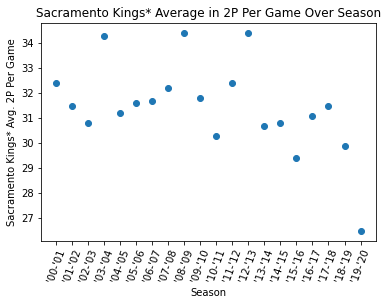

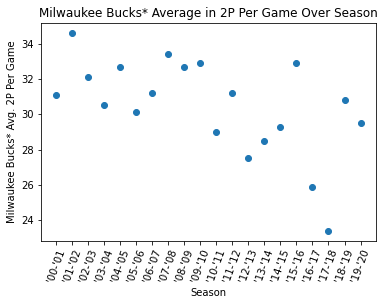

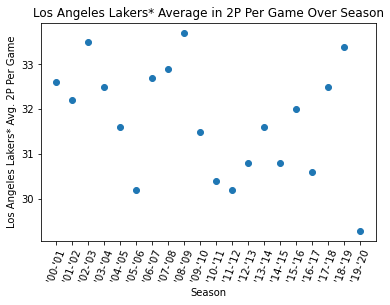

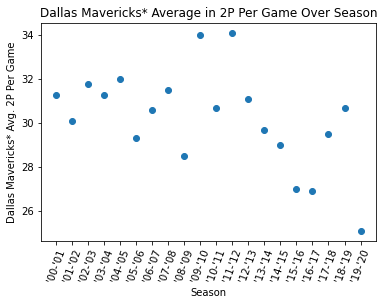

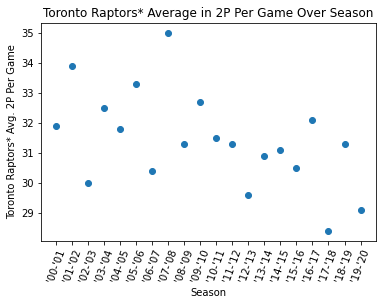

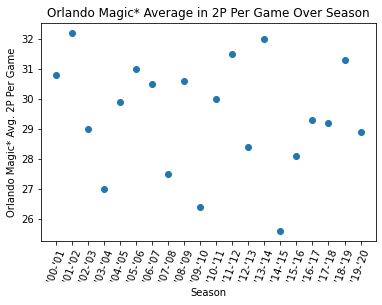

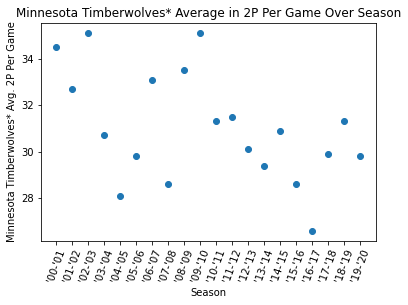

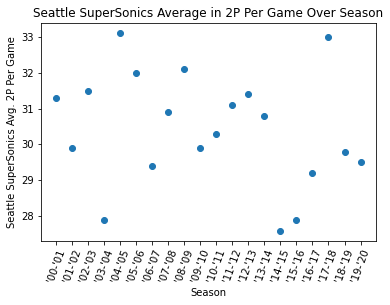

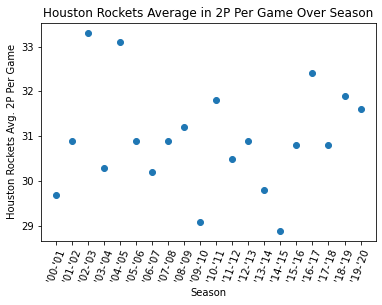

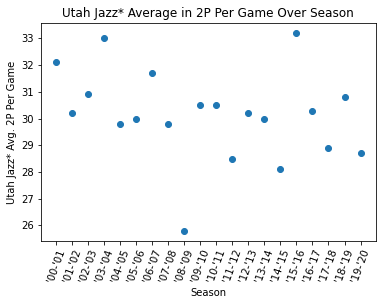

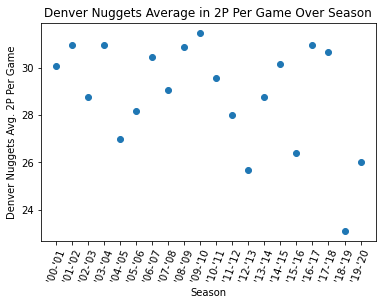

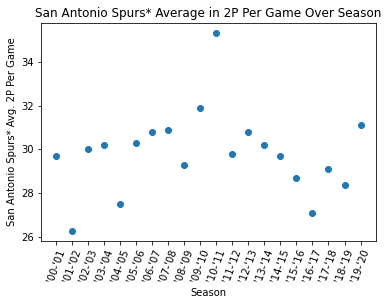

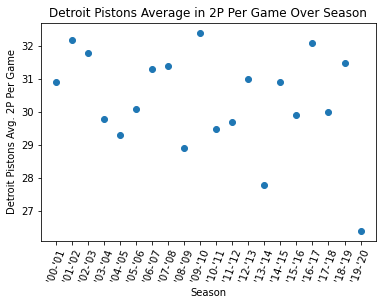

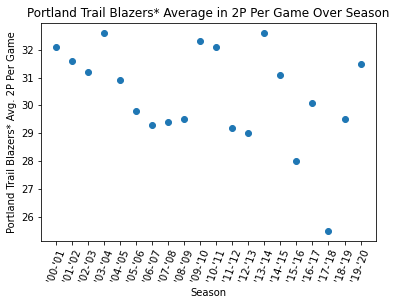

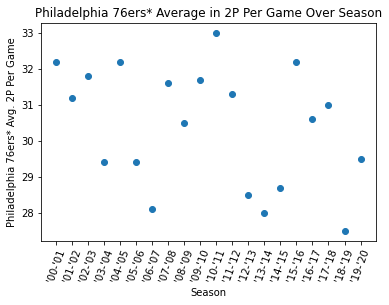

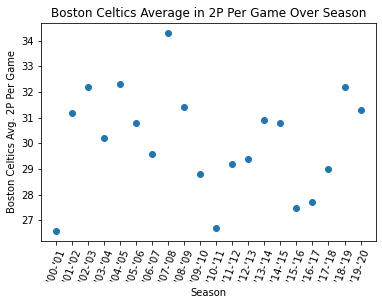

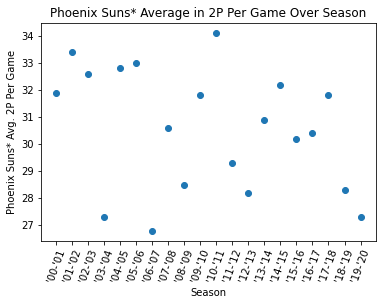

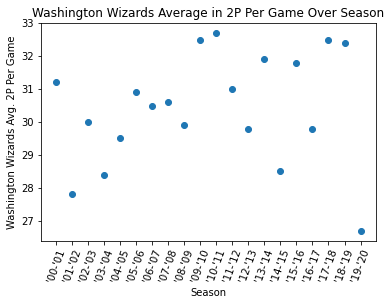

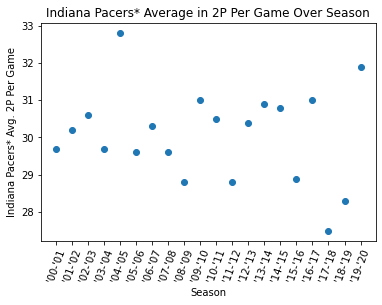

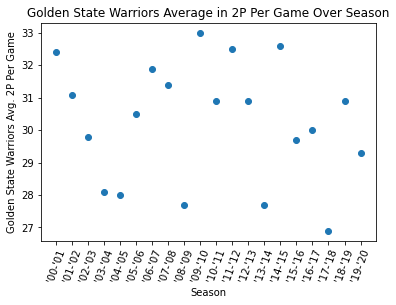

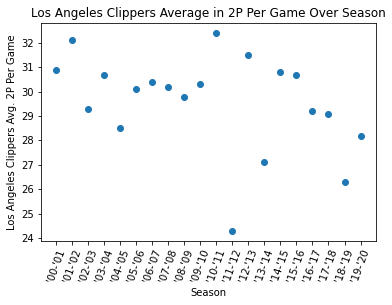

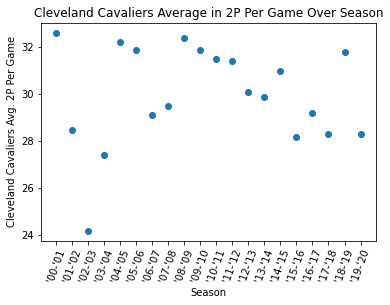

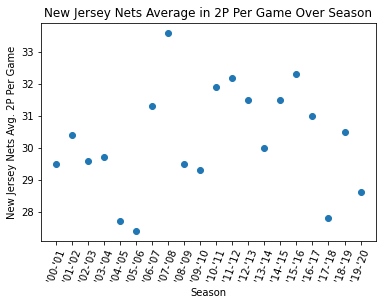

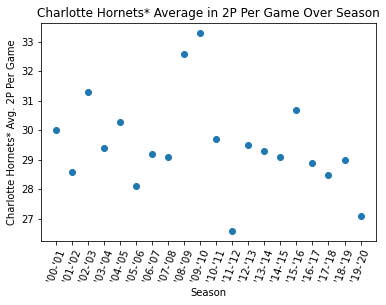

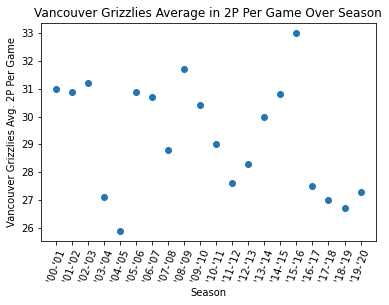

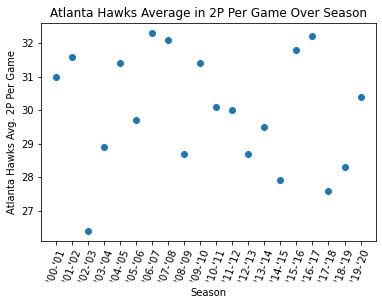

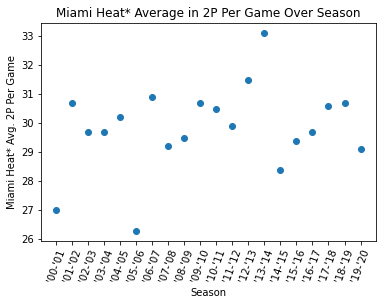

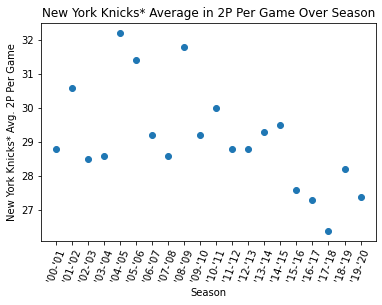

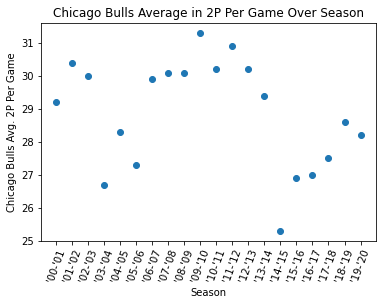

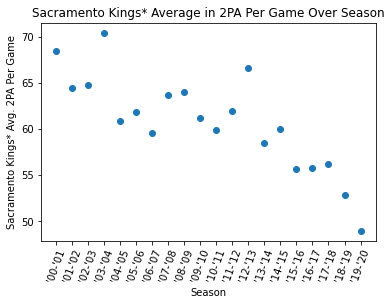

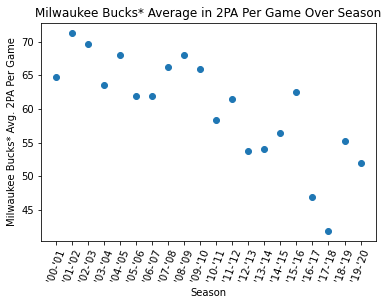

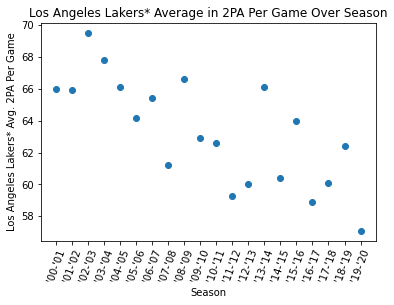

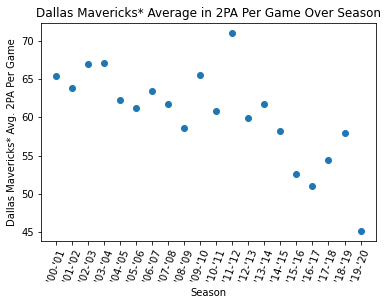

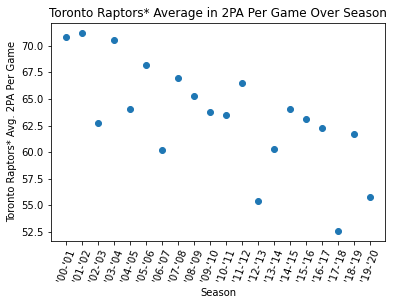

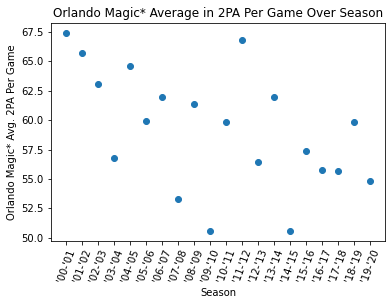

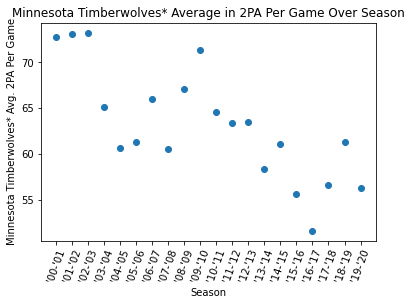

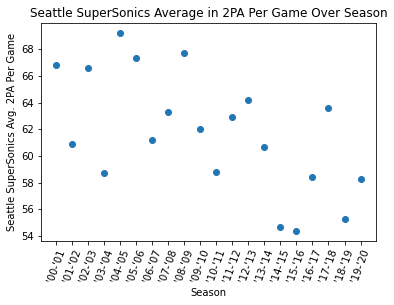

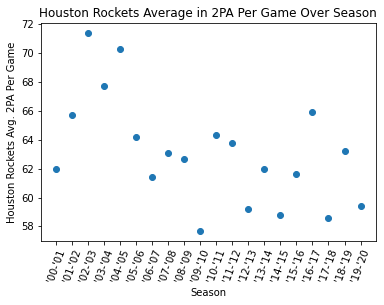

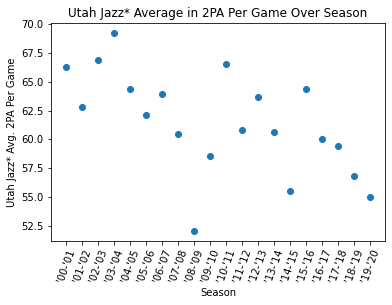

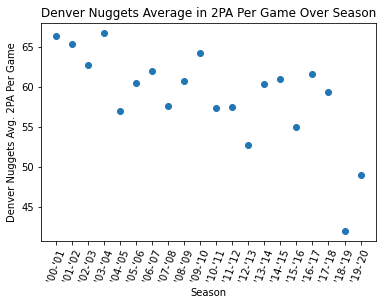

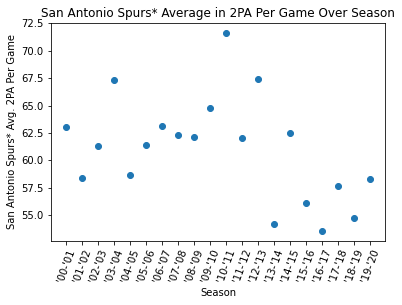

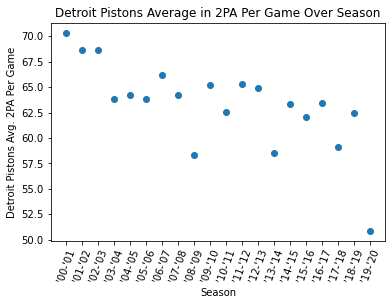

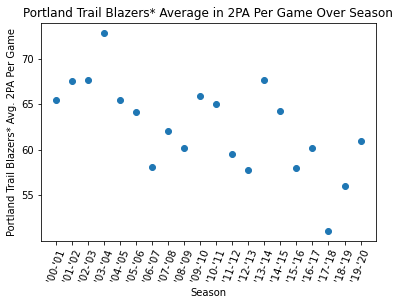

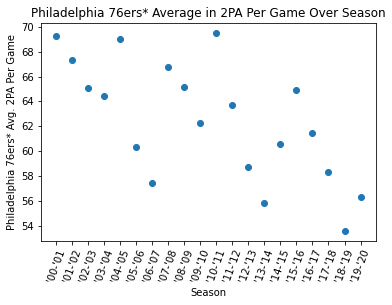

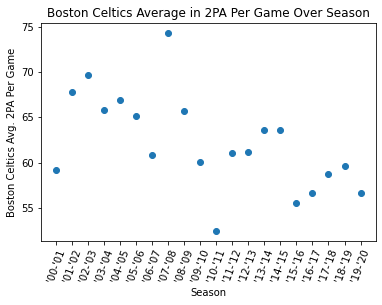

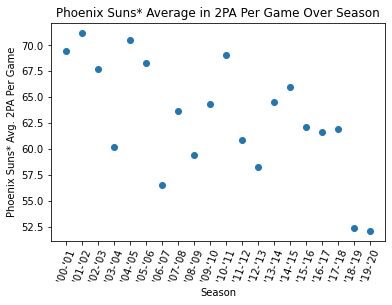

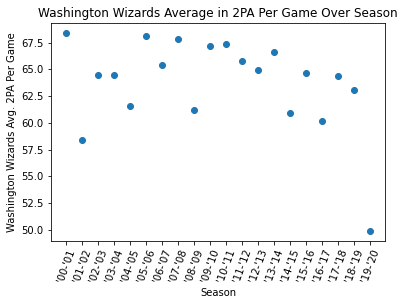

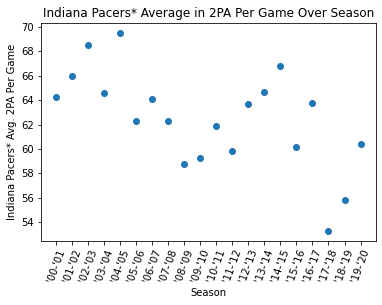

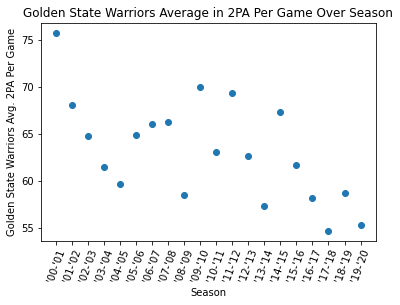

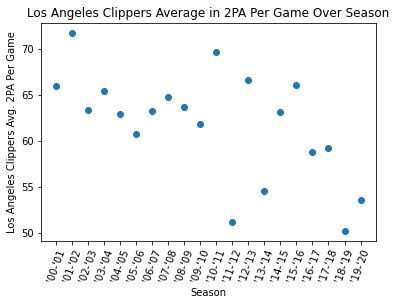

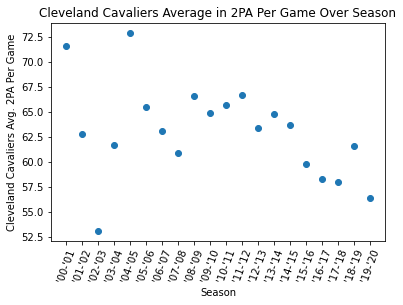

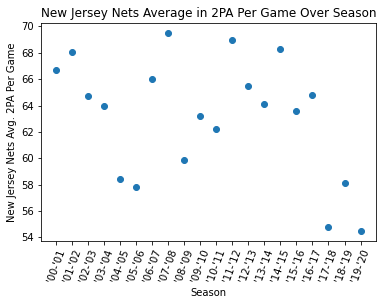

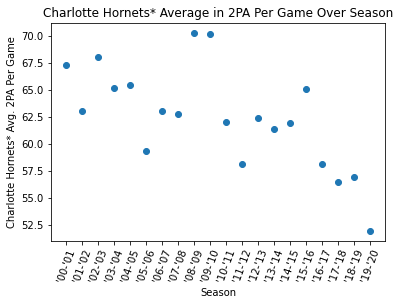

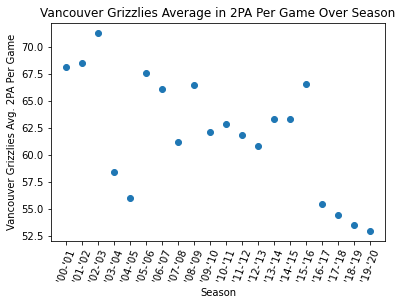

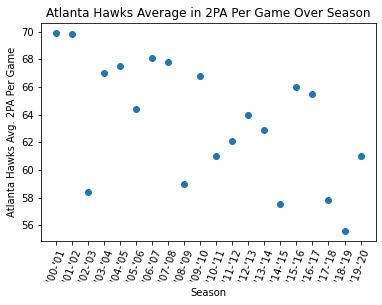

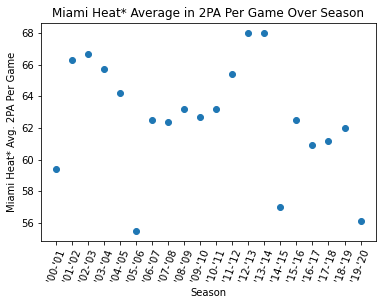

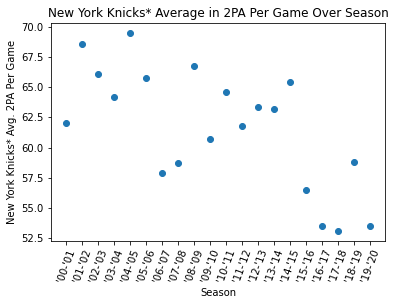

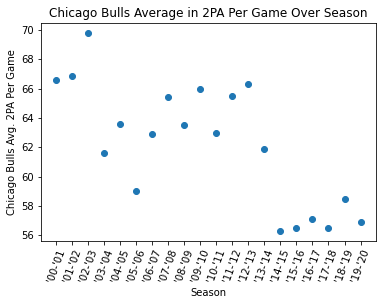

In [ ]:
i = 0
while i < 2:
  plt.clf() # clear the figure used to create the previous scatter plot
  if i == 0:
    stat = '2P'
  else:
    stat = '2PA' 
  y = []

  # for each team in team_per_game table, store the average stat per team per year in the list
  # y so we can use this list to plot y values in our scatter plot
  j = 0
  teams  = -1
  while teams < len(team_per_game_tables[0]) - 2:
    j = 0
    teams+=1
    team = team_per_game_tables[j].iloc[teams][1]
    y = []
    while j < len(team_per_game_tables):
      y.append(float(team_per_game_tables[j].iloc[[teams]][stat]))
      j += 1
      

    plt.scatter(x, y) # create a scatter plot
    plt.xticks(x, rotation=70) # adjust x-tick labels so that they are rotated
    plt.title(team + ' Average in ' + stat + ' Per Game Over Season') # title for plot
    plt.xlabel('Season') # label for x-axis
    plt.ylabel( team + ' Avg. ' + stat + ' Per Game') # label for y-axis
    plt.show() # display the plot
  i += 1

Most teams saw an all time low or one of their lowest in terms of 2 point attempts and successess.  Teams tended to do worse compared to last season in both stats.  While a few teams did increase in this stat, it was after a low in the previous season.

# Part IV: Model: Analysis, Hypothesis Testing, & Machine Learning

This part of the data science life cycle is focused around *statistical inference*, the discipline concerning itself with the development of procedures and theorems for extracting meaning from data generated via random processes. Additionally, hypothesis testing is conducted. A machine learning model is also implemented. Machine learning is a field focused on creating computer models that improve automatically through experience. The experience is the result of models training and learning from training data. Machine learning models often have two possible approaches: *regression* or *classification*. Regression is more focused on prediction of a dependent variable while classification is more focused on categorizing (classifying) new observations into existing classes.

Our hypothesis is that an increase in league average for points per game can be predicted by league averages in FG, 3P, and 3PA. Based on obvious trends seen in our visualizations, this seems like a reasonable claim. The scatter plot for league average in points per game showed steady increase from season to season. There was an increase from '18-'19 season to '19-'20, but it was less than previous years. This hypothesis will form the basis of our predictive model.

It is important to understand what linear regression is to understand machine learning. Generally, we want to predict a dependent variable based on independent variable(s). The number of independent variables (features) changes based on what dependent variable we are predicting. The predicted value of our dependent variable is the result of a linear equation where each feature has a weight and these weighted features are then summed. Our equation looks like this


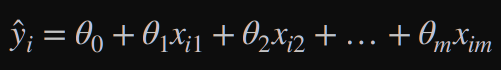

y-hat is the predicted observation, each theta value is a weight, and each x is a feature (synonymously referred to as predictor or independent variable).

Now, consider a scatter plot where the actual data points in our dataset are plotted. In our case, we will examine the league average PTS per game scatter plot we created earlier.

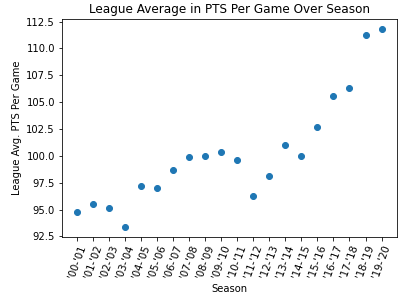

Each one of these datapoints are considered an observation (or sample). Our linear regression model (a line) should fit our data as closely as possible. Now, what does it mean to fit the data as best as possible? There are different methods for determining what constitutes best fit, but the approach we will use is minimization of the *residual sum of squares*. A *residual* is the difference in y value between a predicted observation from our line and the actual observation. The image below shows what four residuals would look like (note that a residual is sometimes referred to as standard error, hence the epsilon notation)
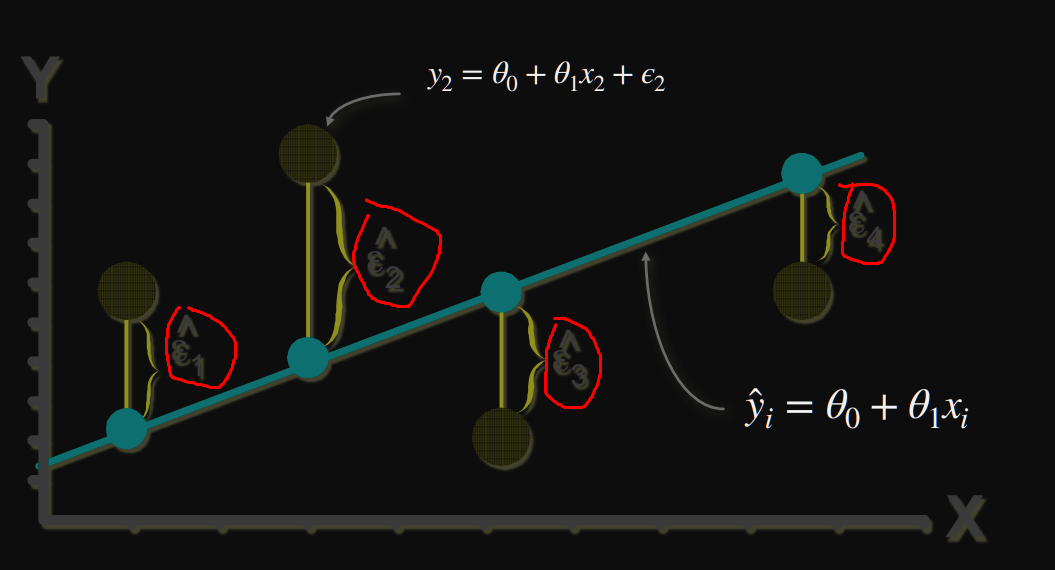 

For a given set of observations, the residual sum of squares is the sum of the squared residuals of all of the observations.

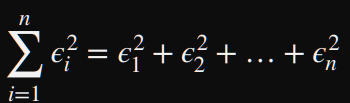

The goal is to minimize this summation so that our linear regression model "fits" the data as best as possible. [See this video by Stat Quest's Josh Starmer](https://www.youtube.com/watch?v=nk2CQITm_eo&t=696s) for if you are still confused about linear regression. This is exactly what we will do in the code below. We will make use of the [scikit-learn](https://scikit-learn.org/stable/index.html) Python library to do this. Sckit-learn is a popular machine learning library. We will create three simple linear regression models that predict PTS per game league averages (dependent variable) based on league averages for field goals, 3-point makes, 3-point attempts (one independent variable per model). We will do this by formatting our independent variable values per season as a vector. The vector will be 20x1 for each model. Each row in the vector will represent an observation (a season's independent variable value) and the singular column will represent an independent variable. We will then evenly split the predictor vector and our 20x1 vector of league average PTS per game into testing and training data for our model. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[35.7, 36.2, 35.7, 35.0, 35.9, 35.8, 36.5, 37.3, 37.1, 37.7, 37.2, 36.5, 37.1, 37.7, 37.5, 38.2, 39.0, 39.6, 41.1, 40.9]
Coefficients: 
 [2.7253053]
Mean squared error: 1.02
Coefficient of determination: 0.96
["'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "'11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20"]
[4.8, 5.2, 5.1, 5.2, 5.6, 5.7, 6.1, 6.6, 6.6, 6.4, 6.5, 6.4, 7.2, 7.7, 7.8, 8.5, 9.7, 10.5, 11.4, 12.2]


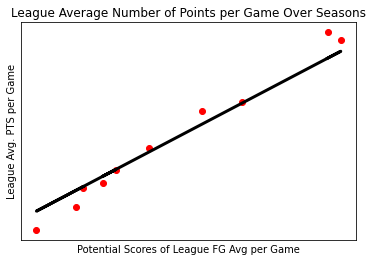

Coefficients: 
 [3.54224816]
Mean squared error: 27.77
Coefficient of determination: -0.09
["'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "'11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20"]
[4.8, 5.2, 5.1, 5.2, 5.6, 5.7, 6.1, 6.6, 6.6, 6.4, 6.5, 6.4, 7.2, 7.7, 7.8, 8.5, 9.7, 10.5, 11.4, 12.2]


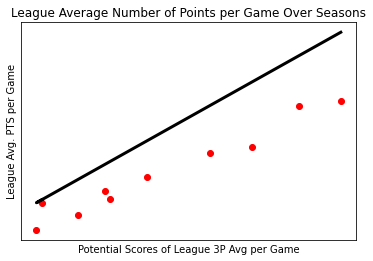

Coefficients: 
 [1.43587594]
Mean squared error: 47.62
Coefficient of determination: -0.87
["'00-'01", "'01-'02", "'02-'03", "'03-'04", "'04-'05", "'05-'06", "'06-'07", "'07-'08", "'08-'09", "'09-'10", "'10-'11", "'11-'12", "'12-'13", "'13-'14", "'14-'15", "'15-'16", "'16-'17", "'17-'18", "'18-'19", "'19-'20"]
[4.8, 5.2, 5.1, 5.2, 5.6, 5.7, 6.1, 6.6, 6.6, 6.4, 6.5, 6.4, 7.2, 7.7, 7.8, 8.5, 9.7, 10.5, 11.4, 12.2]


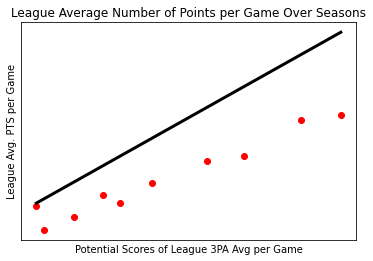

In [ ]:
import statsmodels.formula.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

print(fg)
lst = [pts, fg, three_p, three_p_a]
X = np.array([])

i = 0
while i < len(lst):
  matrix = np.array(lst[i]).reshape(1,20)
  lst[i] = matrix.T # take transpose of 1x20 matrix to create a 20x1 vector
  i += 1

for i in range(1, 4):
  if i == 1:
    stat = 'FG'
  elif i == 2:
    stat = '3P'
  else:
    stat = '3PA'
  plt.clf()
  # Create a 20x1 matrix from each variable's vector
  X = np.c_[lst[i]]
  y = pts

  # Make half of the PTS per game league averages training data, half testing data
  y_train = y[:10]
  y_test = y[-10:]

  # Make half of the years training data, half testing data
  X_train = X[:10]
  X_test = X[-10:]

  # Create a linear regression object
  regr = linear_model.LinearRegression()

  # Train the model with training data
  regr.fit(X_train, y_train)

  pts_y_pred = regr.predict(X_test)

  # The weights (coefficients)
  print('Coefficients: \n', regr.coef_)

  # The mean squared error
  print('Mean squared error: %.2f'
        % mean_squared_error(y_test, pts_y_pred))

  # The coefficient of determination: 1 is perfect prediction
  print('Coefficient of determination: %.2f'
        % r2_score(y_test, pts_y_pred))

  # Plot outputs
  plt.scatter(X_test, y_test,  color='red')
  #plt.scatter(X_test[:,1], y_test,  color='red')

  plt.plot(X_test, pts_y_pred, color='black', linewidth=3)
  plt.title('League Average Number of Points per Game Over Seasons')
  plt.xticks(())
  plt.yticks(())
  plt.xlabel('Potential Scores of League ' + stat + ' Avg per Game')
  plt.ylabel('League Avg. PTS per Game')
  print(x)
  print(three_p)
  plt.show()

Above, we see three simple linear regression models (only one predictor variable at play in each). The lines created were calculated by minimizing the residual sum of squares. Our regression model where the predictor variable was league average field goals made per game seemed to do a great job at predicting league average points per game. We know this to be true because the line clearly lies on top of most of the datapoints and the mean squared error is very small at 1.02. This is what we look for in a reliable prediction model. This means we could use the regression model to predict future possible league averages for PTS per game, which is useful.

As you might have noticed, the lines for 3PA and 3P predictor models do not lie on top of most of our data points as we had hoped. When this happens, this often means that our predictor(s) are not the best predictors to use. Another possible explanation for this is a poorly trained model. In our case, we trained the model using one half of the data in sequential order, and then testing against the other half. Perhaps this could be improved by assigning training and testing data in a more stochastic (random) fashion. Nonetheless, while our 3P and 3PA predictor variables are not as good as we may have hoped, the lines are still somewhat near the observations. Note how the mean squared errors are large in both cases. Our hypothesis has been proven wrong, and we have found that field goals per game alone predicts points per game well.

When predicting real world outcomes, it is often the case that multiple predictor variables interact with one another and have a net effect in predicting a variable. Linear regression models that represent this scenario are considered multivariate. In the above examples, there was a single predictor variable per model, so they were univariate regression models. Using FG per game league averages as a predictor works so well that there is no real need for a multivariate model, but we will create one below just for fun. Our multivariate model will have two dependent variables: 3P and 3PA. 

Coefficients: 
 [2.72225642 0.33487953]
Mean squared error: 32.13
Coefficient of determination: -0.26


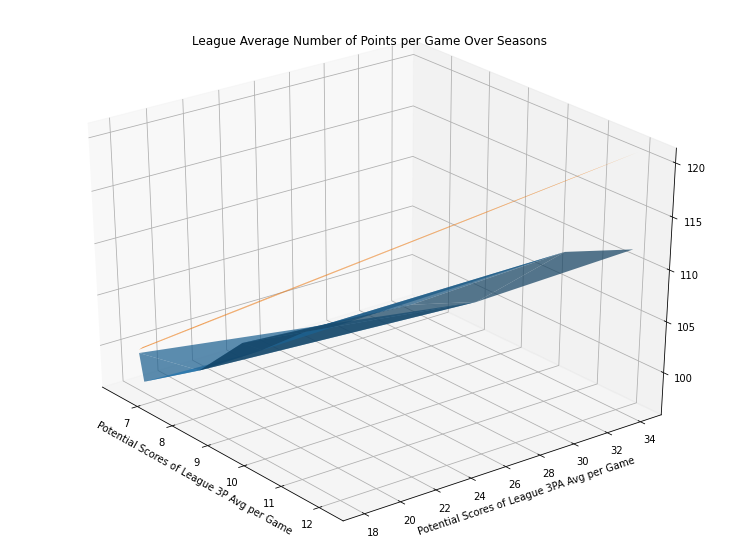

In [ ]:
# Create a 20x2 matrix from each variable's vector
X = np.c_[lst[2], lst[3]]
y = pts

# Make half of the PTS per game league averages training data, half testing data
y_train = y[:10]
y_test = y[-10:]

# Make half of the years training data, half testing data
X_train = X[:10]
X_test = X[-10:]

# Create a linear regression object
regr = linear_model.LinearRegression()

# Train the model with training data
regr.fit(X_train, y_train)

pts_y_pred = regr.predict(X_test)

# The weights (coefficients)
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pts_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, pts_y_pred))

# figsize changes size of our outputted visual
plt3d = plt.figure(figsize=(13,10)).gca(projection='3d')
plt3d.view_init(azim=322) # View our plot from 322 degree angle
# plot 3d visual of actual data
plt3d.plot_trisurf(X_test[:,0], X_test[:,1], y_test, alpha=0.7, antialiased=True)
# plot 3d visual of linear regression model
plt3d.plot_trisurf(X_test[:,0], X_test[:,1], pts_y_pred, alpha=0.7, antialiased=True)

plt.xlabel('Potential Scores of League 3P Avg per Game')
plt.ylabel('Potential Scores of League 3PA Avg per Game')
plt.title('League Average Number of Points per Game Over Seasons')
# print(x)
# print(three_p)
plt.show()

Since the regression is bivariate, our model actually predicts observations in a 3D plane. When a predictor variable is added, another plane of dimensionality is introduced into the mix. Thus, it becomes hard to visualize regression models that exceed bivariate. Regression models that exceed bivariate are typically analyzed purely in terms of the numbers. The bivariate regression model has a mean squared error of 32.13, which is right in between the mean squared errors for the predictor variables' univariate models (27.77 and 47.26).The bivariate model creates better predictions for league average PTS per game than the univariate model where 3PA is the predictor variable.

# Part V: Interpretation: Insight & Policy Decision

The final part of the data science lifecycle is to interpret our findings to improve insight and/or policy decisions for the future. There are no policy decisions to be made based on the subject we are dealing with, but insight can be improved. In our study we focused primarily on general trends in NBA averages on a per game basis over the course of the past two decades. We discussed how in the earlier days of the NBA, a unique playstyle favored a more physical, down-low game that had a clear preference for 2-point field goals. In more recent years, the game has highs in 3-point make and attempt averages per game. The transition in play-style has clearly been evidenced by upward trends in the scatter plots created in our data visualization phase.

We analyzed league averages in different metrics as well as individual team averages in those metrics to see how the different teams contributed to league averages. We considered how metrics in the 2019-2020 season may have differed from previous seasons due to the new environment players were forced to deal with in the COVID-19 induced "bubble." We explored linear regression models that used predictors such as average per game 3-point makes, 3-point attempts, and field goals made to predict league average number of points per game. We found that the best predictor variable was field goals made, but 3P and 3PA still made somewhat decent predictions. 

Based on our findings we can say that it is likely that as field goals per game increase, the number of point per game will also increase. This is somewhat obvious, but it has been proved nonetheless. In future seasons, we can expect to see continued decreases in 2-point attempts per game and 2-point makes per game. We can also expect continued increases in 3-point attempts per game and 3-point makes per game. This concludes our tutorial.

Sources: 
- https://en.wikipedia.org/wiki/2019%E2%80%9320_NBA_season#:~:text=The%202019%E2%80%9320%20NBA%20season,of%20the%20COVID%2D19%20pandemic.
- https://www.espn.com/nba/story/_/id/30055011/everything-happened-nba-bubble
- https://www.fueledbysports.com/list-of-nba-teams-in-alphabetical-order/
- https://www.chicagotribune.com/sports/bulls/ct-chicago-bulls-nba-teams-practice-20200819-o5kxfxsdybfvxmsqggoschvo2m-story.html
- https://www.basketball-reference.com/
- http://www.cs.umd.edu/class/fall2020/cmsc320-0201/files/Lec07-LinearRegression.pdf
- SKlearn documentation
- NumPy documentation
- Matplotlib documentation
- Pandas documentation